In [ ]:
!pip install umap-learn

In [ ]:
import tensorflow as tf
import numpy as np
import random
import torch
import matplotlib.pyplot as plt
from tensorflow.python.framework.ops import disable_eager_execution
from google.colab import drive

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px
import umap.umap_ as umap
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from keras.utils import to_categorical
import warnings
from keras.layers import Input, Dense, Lambda, Reshape, Flatten, BatchNormalization
from keras.layers import concatenate as concat
from keras.models import Model
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

disable_eager_execution()
print(tf.executing_eagerly())

random_seed=3
random.seed(random_seed)

False


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path =  '/content/drive/MyDrive/Dissertacao_Marjorie/'

In [ ]:
# Carregar o arquivo de treinamento
data = pd.read_csv(path + 'raman_15_01_2023.csv', index_col=False)
data.head()

,time,raman_1,raman_2,raman_3,raman_4,raman_5,raman_6,raman_7,raman_8,raman_9,...,raman_1897,raman_1898,raman_1899,raman_1900,raman_1901,rdi,b2,cao,feo,sio2
0,26-Aug-19,20.164283,52.036467,79.844790,103.716821,123.780133,140.162296,152.990882,162.393461,168.497604,...,-77.353297,-78.368291,-78.299440,-77.031477,-74.449132,14.896,1.637,12.383,6.570,7.577
1,27-Aug-19,-161.704917,-123.376786,-90.797857,-63.525298,-41.116276,-23.127960,-9.117518,1.357884,8.741076,...,-58.507702,-53.771423,-46.852941,-37.450795,-25.263524,12.052,1.602,12.217,6.822,7.640
2,28-Aug-19,-41.620396,-27.485395,-13.707676,-0.457282,12.095746,23.781363,34.429527,43.870196,51.933326,...,-64.032567,-88.332703,-119.183051,-157.213669,-203.054614,11.281,1.622,12.300,7.165,7.588
3,29-Aug-19,-34.277541,-18.293176,-4.358410,7.665343,17.916670,26.534158,33.656395,39.421965,43.969458,...,-59.522687,-59.236359,-58.566376,-57.572215,-56.313348,14.029,1.663,12.700,6.647,7.637
4,30-Aug-19,-46.786611,-47.484178,-45.580712,-41.458048,-35.498018,-28.082458,-19.593201,-10.412081,-0.920932,...,-127.463596,-131.622780,-131.949285,-127.770879,-118.415329,14.827,1.590,12.200,6.738,7.668


In [ ]:
data.index = pd.to_datetime(data["time"])
data.drop(['time'], axis=1, inplace=True)
#data.drop(['Data'], axis=1, inplace=True)
data = data.dropna()
data.tail()

,raman_1,raman_2,raman_3,raman_4,raman_5,raman_6,raman_7,raman_8,raman_9,raman_10,...,raman_1897,raman_1898,raman_1899,raman_1900,raman_1901,rdi,b2,cao,feo,sio2
time,,,,,,,,,,,,,,,,,,,,,
2022-04-24,-76.324289,-69.473159,-58.990500,-45.405931,-29.249075,-11.049551,8.663019,29.359014,50.508813,71.582795,...,-119.425873,-108.494457,-89.531493,-61.576647,-23.669585,11.782,1.859,13.100,7.000,7.047
2022-04-26,-104.007278,-90.786169,-77.442371,-64.038884,-50.638707,-37.304836,-24.100272,-11.088011,1.668946,14.107603,...,-79.853102,-83.962884,-88.634699,-93.947474,-99.980137,16.137,1.791,12.183,7.238,6.805
2022-04-27,-52.757555,-33.138861,-14.401714,3.410197,20.253184,36.083558,50.857632,64.531717,77.062125,88.405168,...,-104.961171,-109.820888,-110.841376,-107.367691,-98.744888,15.957,1.828,12.317,7.330,6.738
2022-04-28,-73.076352,-39.597874,-15.222351,1.107773,10.450052,13.862043,12.401299,7.125378,-0.908167,-10.641780,...,-57.361767,-51.542334,-46.798989,-43.556290,-42.238791,16.877,1.803,12.300,6.658,6.823
2022-04-29,-111.886869,-103.190590,-93.489719,-82.925901,-71.640783,-59.776011,-47.473230,-34.874086,-22.120226,-9.353296,...,-75.692376,-82.679156,-92.214687,-104.776463,-120.841978,15.875,1.816,12.620,7.092,6.950


In [ ]:
# Separar dados em vetores de entrada e saída
# Separar dados em vetores de entrada e saída
X = data.iloc[0:, :-5].values
rdi = data["rdi"]
b2 = data["b2"]
feo = data["feo"]
cao = data["cao"]
sio2 = data["sio2"]

In [ ]:
X.shape

(257, 1901)

Text(0, 0.5, 'Intensidade')

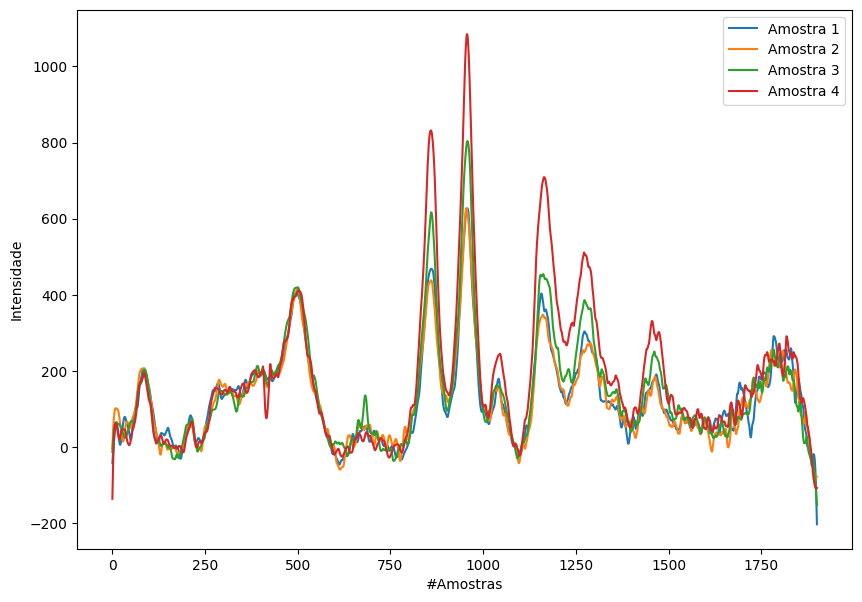

In [ ]:
fig = plt.figure(figsize = (10, 7))

plt.plot(X[2,:])
plt.plot(X[11,:])
plt.plot(X[26,:])
plt.plot(X[30,:])
plt.legend(['Amostra 1','Amostra 2','Amostra 3','Amostra 4'])
plt.xlabel('#Amostras')
plt.ylabel('Intensidade')

In [ ]:
# scale data
scaler = StandardScaler().fit(X.T)
#scaler = MinMaxScaler().fit(X.T)
Xnorm = scaler.transform(X.T).T

Text(0, 0.5, 'Intensidade Normalizada')

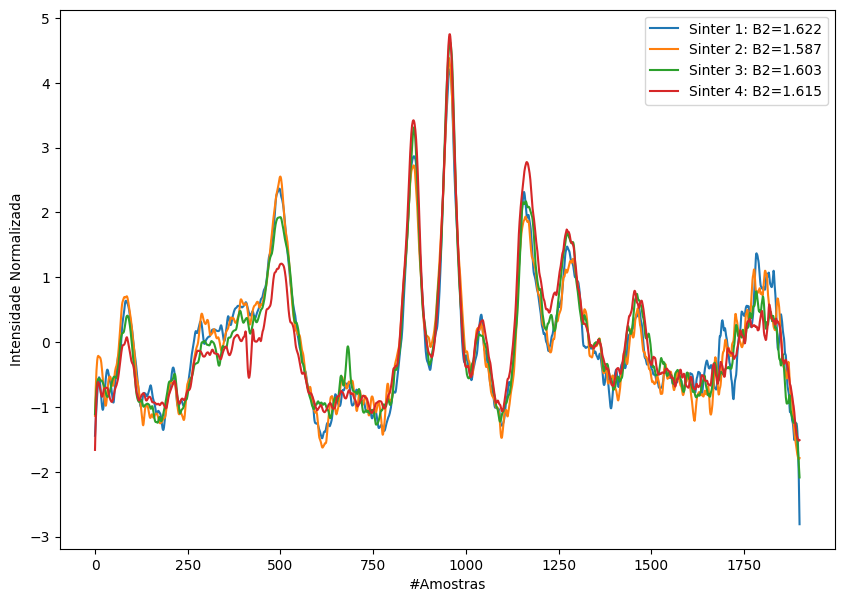

In [ ]:
fig = plt.figure(figsize = (10, 7))

plt.plot(Xnorm[2,:])
plt.plot(Xnorm[11,:])
plt.plot(Xnorm[26,:])
plt.plot(Xnorm[30,:])
plt.legend(['Sinter 1: B2=1.622','Sinter 2: B2=1.587','Sinter 3: B2=1.603','Sinter 4: B2=1.615'])
plt.xlabel('#Amostras')
plt.ylabel('Intensidade Normalizada')

In [ ]:
lim1 = 1; #400
lim2 = 51; #450

lim3 = 801; #1200
lim4 = 901; #1300

lim5 = 201; #600
lim6 = 401; #800

lim7 = 401; #800
lim8 = 601; #1000

lim9 = 1101; #1500
lim10 = 1301; #1700

Xsub1 = Xnorm[:,lim1:lim2]
Xsub2 = Xnorm[:,lim3:lim4]
Xsub3 = Xnorm[:,lim5:lim6]
Xsub4 = Xnorm[:,lim7:lim8]
Xsub5 = Xnorm[:,lim9:lim10]

#Xnew = np.concatenate((Xsub1,Xsub2,Xsub3,Xsub4,Xsub5),axis=1)
Xnew = Xnorm
#Xnew = umap_data
#Xnew = tsne_data
#Xnew = X_pca

In [ ]:
y = b2.values
#y = feo.values
#y = rdi.values

## Conditional VAE - Keras

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(Xnew, y, test_size=0.1, random_state=42)

In [ ]:
#y_train = Y_train
#y_val = Y_val

In [ ]:
warnings.filterwarnings('ignore')
%pylab inline

hidden_dim = 100 # latent space size
batch_size = 3 # batch size
optim = Adam(learning_rate=0.0001)


n_x = X_train.shape[1]
n_y = y_train.shape[0]


n_epoch = 50

Populating the interactive namespace from numpy and matplotlib


In [ ]:
def sample_z(args):
    mu, l_sigma = args
    eps = K.random_normal(shape=(m, n_z), mean=0., stddev=1.)
    return mu + K.exp(l_sigma / 2) * eps

In [ ]:
def noiser(args):
    global mean, log_var
    mean, log_var = args
    N = K.random_normal(shape=(batch_size, hidden_dim), mean=0., stddev=1.0)
    return K.exp(log_var / 2) * N + mean

In [ ]:
# Encoder
#X = Input(shape=(n_x,))
#label = Input(shape=(n_y,))

inp = Input(batch_shape=(batch_size, n_x))
fl = Flatten()(inp)
lb = Input(shape=(1,))
x = concat([fl, lb])
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)

In [ ]:
# Latent Space
mean = Dense(hidden_dim)(x)
log_var = Dense(hidden_dim)(x)
h = Lambda(noiser, output_shape=(hidden_dim,), name="latent_space")([mean, log_var])

In [ ]:
# Decoder
input_dec = Input(shape=(hidden_dim,))
lb_dec = Input(shape=(1,)) #1 = size of y (regression)
d = concat([input_dec, lb_dec])
d = Dense(64, activation="relu")(d)
d = Dense(128, activation="relu")(d)
d = Dense(n_x, activation="LeakyReLU")(d) #n_x = size output transform
decoded = Reshape((n_x,))(d)

In [ ]:
def vae_loss(input, output):
    # compute the average MSE error, then scale it up i.e. simply sum on all axes
    reconstruction_loss = K.sum(K.square(output-input))
    #reconstruction_loss = K.sum(K.binary_crossentropy(y, x), axis=-1)
    # compute the KL loss
    kl_loss = -0.5 * K.sum(1 + log_var - K.square(mean) - K.square(K.exp(log_var)), axis=-1)
    # return the average loss over all images in batch
    total_loss = K.mean(reconstruction_loss + kl_loss)
    return total_loss

In [ ]:
# CVAE
encoder = Model([inp, lb], h, name="encoder")
decoder = Model([input_dec, lb_dec], decoded, name="decoder")
cvae = Model(
    inputs=[inp, lb, lb_dec],
    outputs=decoder([encoder([inp, lb]), lb_dec]),
    name="cvae"
)

cvae.compile(optimizer='adam', loss=vae_loss)
cvae.summary()

Model: "cvae"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(3, 1901)]                  0         []                            
                                                                                                  
 input_10 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 encoder (Functional)        (3, 100)                     264840    ['input_9[0][0]',             
                                                                     'input_10[0][0]']            
                                                                                                  
 input_12 (InputLayer)       [(None, 1)]                  0         []                         

In [ ]:
epochs = 200

cvae.fit(
    [X_train, y_train, y_train], X_train,
    epochs=epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_split=0.1,
    callbacks = [EarlyStopping(patience = 5)]
)

Train on 207 samples, validate on 24 samples
Epoch 1/200
207/207 [==============================] - 1s 5ms/sample - loss: 1711.8910 - val_loss: 859.1867
Epoch 2/200
207/207 [==============================] - 1s 3ms/sample - loss: 678.7643 - val_loss: 581.4379
Epoch 3/200
207/207 [==============================] - 0s 2ms/sample - loss: 543.3234 - val_loss: 483.4446
Epoch 4/200
207/207 [==============================] - 0s 2ms/sample - loss: 461.3782 - val_loss: 472.3593
Epoch 5/200
207/207 [==============================] - 0s 2ms/sample - loss: 447.8224 - val_loss: 441.6748
Epoch 6/200
207/207 [==============================] - 1s 3ms/sample - loss: 366.9945 - val_loss: 395.9629
Epoch 7/200
207/207 [==============================] - 1s 3ms/sample - loss: 348.1507 - val_loss: 370.5470
Epoch 8/200
207/207 [==============================] - 1s 3ms/sample - loss: 323.5329 - val_loss: 351.6564
Epoch 9/200
207/207 [==============================] - 1s 5ms/sample - loss: 320.6877 - val_loss: 

## Visualize Latent Space

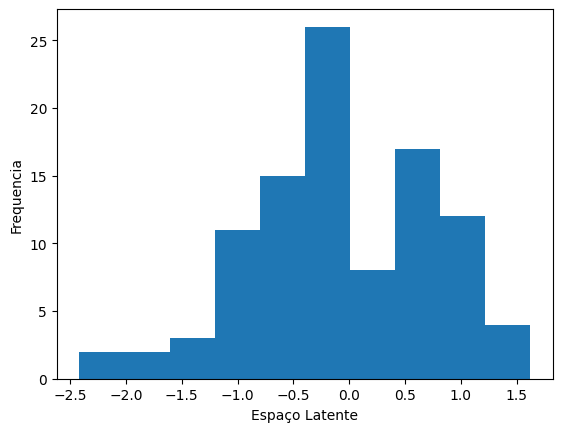

In [ ]:
z_train = encoder.predict([X_train, y_train])
encodings= np.asarray(z_train)

plt.hist(z_train[2,:])
plt.xlabel('Espaço Latente')
plt.ylabel('Frequencia')
plt.show()

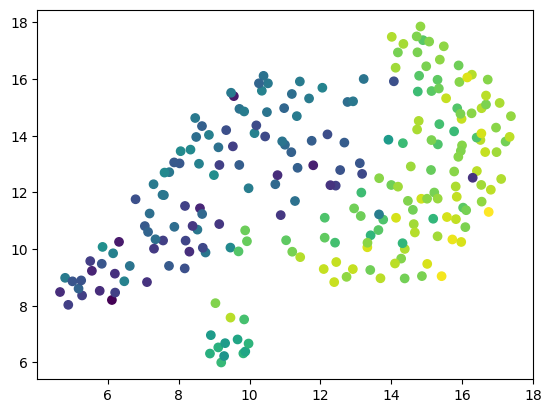

In [ ]:
# UMAP
x_reducer = umap.UMAP(n_components=2, metric='braycurtis',
                    min_dist=0.8, random_state=42)
X_emb = x_reducer.fit_transform(X_train)

plt.scatter(X_emb[:, 0], X_emb[:, 1], c=y_train)

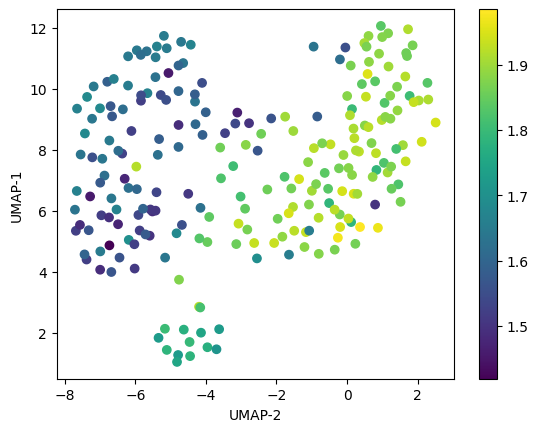

In [ ]:
# Espaço latente reduzido

z_reducer = umap.UMAP(n_components=2, metric='braycurtis',
                    min_dist=0.8, random_state=42)
z_emb = z_reducer.fit_transform(z_train)

plt.scatter(z_emb[:, 0], z_emb[:, 1], c=y_train)
plt.xlabel('UMAP-2')
plt.ylabel('UMAP-1')

cbar = colorbar()
cbar.solids.set_edgecolor("face")
draw()

In [ ]:
x_reducer_3d = umap.UMAP(n_components=3, metric='braycurtis', min_dist=0.8, random_state=42)
embedding = x_reducer_3d.fit_transform(X_train)
df = pd.DataFrame(embedding, columns=['UMAP-1','UMAP-2','UMAP-3'])

fig = px.scatter_3d(
    df, x="UMAP-1", y="UMAP-2", z="UMAP-3",
    color=y_train
)
fig.update_traces(marker_size=8)
fig.show()


## Generate New Data

In [ ]:
max_y = max(y)
min_y = min(y)

In [ ]:
max_y

1.985

In [ ]:
min_y

1.419

In [ ]:
mu, sigma = 0, 1.0 # mean and standard deviation
z_new_sample = np.random.normal(mu, sigma, (1,100))
y_new_sample = np.random.uniform(min_y, max_y, (1,))
print(y_new_sample)

x_decoded = decoder.predict([z_new_sample, y_new_sample])

[1.67359104]


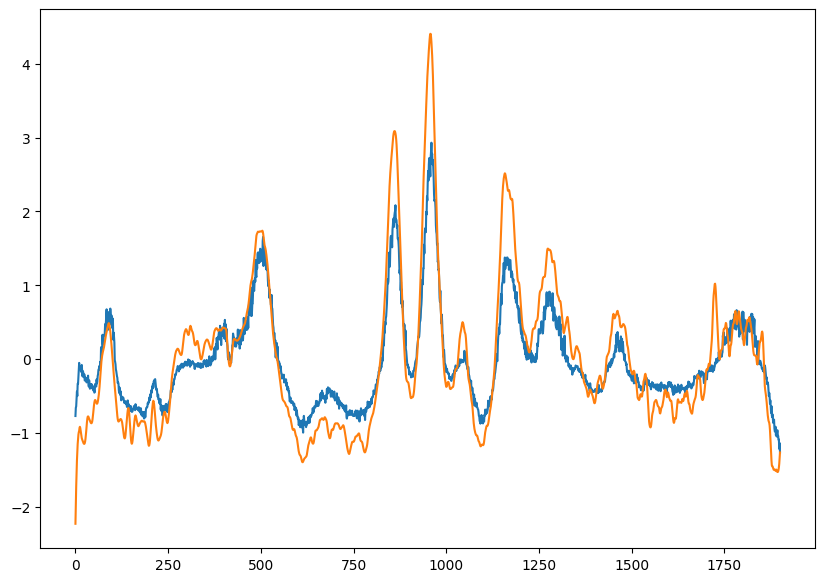

In [ ]:
fig = plt.figure(figsize = (10, 7))

plt.plot(x_decoded[0,:])
plt.plot(Xnew[1,:])

In [ ]:
random.seed(3)

tam_new_samples = 100
mu, sigma = 0, 1.0 # mean and standard deviation
z_new_sample = np.random.normal(mu, sigma, (tam_new_samples, hidden_dim))
y_new_sample = np.random.uniform(min_y, max_y, (tam_new_samples,))

X_dec = np.empty(shape = (tam_new_samples,1901))
y_dec = np.empty(shape = (tam_new_samples,1))

for i in range(tam_new_samples):
  y_dec[i] = y_new_sample[i,]
  #print(y_new_sample)

  x_decoded = decoder.predict([z_new_sample[i,:].reshape(1, -1), y_new_sample[i,].reshape(1,)])
  X_dec[i,: ] =  x_decoded


In [ ]:
y_new_sample[1]

1.6992066503392382

In [ ]:
X_aug = np.append(X_train, X_dec, axis=0)
y_aug = np.append(y_train, y_dec)

Text(0, 0.5, 'Intensidade')

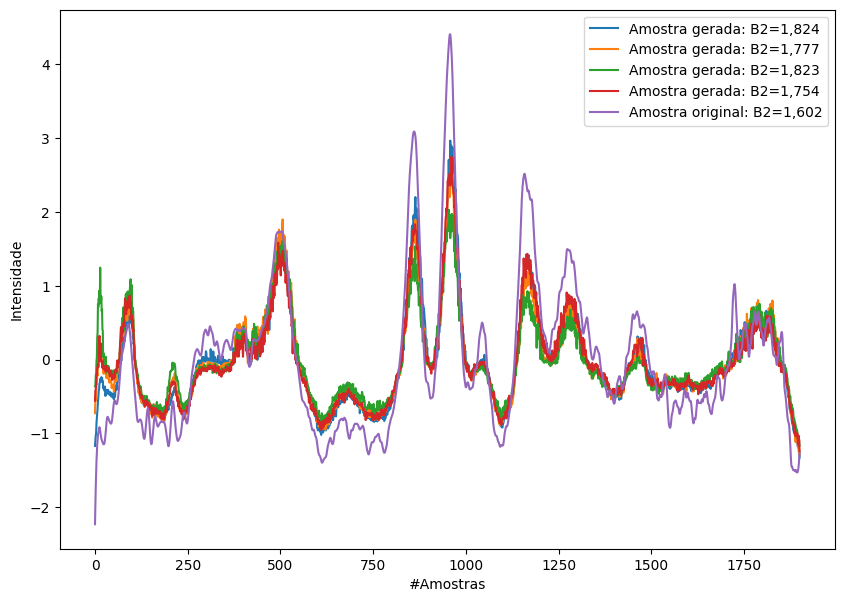

In [ ]:
fig = plt.figure(figsize = (10, 7))

plt.plot(X_dec[1,: ])
plt.plot(X_dec[33,: ])
plt.plot(X_dec[5,: ])
plt.plot(X_dec[23,: ])
plt.plot(Xnew[1,:])

plt.legend(['Amostra gerada: B2=1,824', 'Amostra gerada: B2=1,777', 'Amostra gerada: B2=1,823', 'Amostra gerada: B2=1,754', 'Amostra original: B2=1,602'])
plt.xlabel('#Amostras')
plt.ylabel('Intensidade')

Text(0, 0.5, 'UMAP-1')

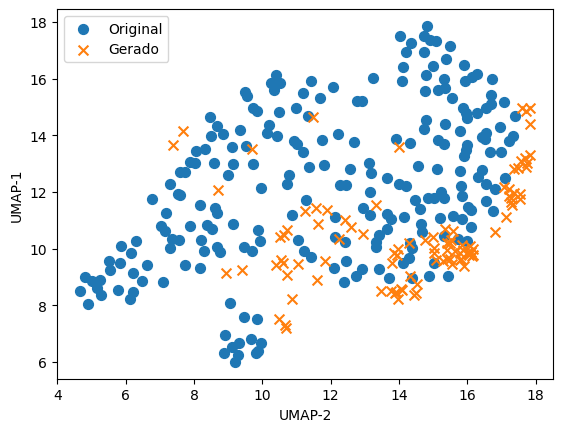

In [ ]:
# UMAP

X_emb_aug = x_reducer.transform(X_aug)
X_emb_dec = x_reducer.transform(X_dec)

#plt.scatter(X_emb[:, 0], X_emb[:, 1], c=y_train)
plt.scatter(X_emb[:, 0], X_emb[:, 1], marker='o',s=50)
plt.scatter(X_emb_dec[:, 0], X_emb_dec[:, 1],  marker='x',s=50)
#plt.scatter(X_emb_dec[:, 0], X_emb_dec[:, 1],  c=y_dec)

plt.legend(['Original','Gerado'])
plt.xlabel('UMAP-2')
plt.ylabel('UMAP-1')


### Algoritmos (Sem aumento de dados)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define the parameters and their range
parameters = {'n_neighbors':np.arange(2, 30, 1)}
#Run a Grid search, using R^2 as the metric to optimise alpha
model_knn= RandomizedSearchCV(KNeighborsRegressor(), parameters, scoring='r2', cv=10, random_state=23)
# Fit to the data
model_knn.fit(X_train, y_train)
#Get the optimised value of alpha
print('Best parameter n_neighbors = ', model_knn.best_params_['n_neighbors'])
print('R2 calibration: %5.3f'  % model_knn.score(X_train,y_train))
# Run a knn regression with the optimised value
model_knn1 = KNeighborsRegressor(n_neighbors=model_knn.best_params_['n_neighbors'])
y_cv = cross_val_predict(model_knn1, X_train, y_train, cv=10)
# y_cv=predicted
score_cv = r2_score(y_train, y_cv)
mse_cv = mean_squared_error(y_train, y_cv, squared=False)
print('R2 CV: %5.3f'  % score_cv)
print('RMSE CV: %5.3f' % mse_cv)

Best parameter n_neighbors =  5
R2 calibration: 0.893
R2 CV: 0.831
RMSE CV: 0.064


In [ ]:
# Teste
model_knn1.fit(X_train, y_train)
yhat_knn = model_knn1.predict(X_val)

print("RMSE:",mean_squared_error(yhat_knn, y_val, squared=False))
print("R2:",r2_score(yhat_knn, y_val))

RMSE: 0.04531398154076645
R2: 0.8962281056268366


In [ ]:
from sklearn.cross_decomposition import PLSRegression

# Define the parameters and their range
parameters = {'n_components':np.arange(2, 30, 1)}
#Run a Grid search, using R^2 as the metric to optimise alpha
model_pls= RandomizedSearchCV(PLSRegression(), parameters, scoring='r2', cv=10, random_state=23)
# Fit to the data
model_pls.fit(X_train, y_train)
#Get the optimised value of alpha
print('Best parameter n_components = ', model_pls.best_params_['n_components'])
print('R2 calibration: %5.3f'  % model_pls.score(X_train,y_train))
# Run a ridge regression with the optimised value
model_pls1 = PLSRegression(n_components=model_pls.best_params_['n_components'])
y_cv = cross_val_predict(model_pls1, X_train, y_train, cv=10)
# y_cv=predicted
score_cv = r2_score(y_train, y_cv)
mse_cv = mean_squared_error(y_train, y_cv, squared=False)
print('R2 CV: %5.3f'  % score_cv)
print('RMSE CV: %5.3f' % mse_cv)

Best parameter n_components =  5
R2 calibration: 0.888
R2 CV: 0.816
RMSE CV: 0.066


In [ ]:
# Teste
model_pls1.fit(X_train, y_train)
yhat_pls = model_pls1.predict(X_val)
print("RMSE:",mean_squared_error(yhat_pls,y_val,squared=False))

RMSE: 0.058924906607548774


In [ ]:
from sklearn.svm import SVR
from scipy import stats

# Define the parameters and their range
parameters = {"C": stats.uniform(0.1,100), "epsilon": stats.expon(scale=.1),
              "kernel": ['rbf', 'linear', 'sigmoid']}
#Run a Grid search, using R^2 as the metric to optimise alpha
model_svr = RandomizedSearchCV(SVR(gamma='auto'), parameters, scoring='r2', cv=10, random_state=42)
# Fit to the data
model_svr.fit(X_train, y_train)
#Get the optimised value of alpha
print('Best parameter epsilon = ', model_svr.best_params_['epsilon'])
print('Best parameter C = ', model_svr.best_params_['C'])
print('Best parameter kernel = ', model_svr.best_params_['kernel'])
#print('Best parameter gamma = ', model_svr.best_params_['gamma'])
print('R2 calibration: %5.3f'  % model_svr.score(X_train,y_train))
# Run a ridge regression with the optimised value
model_svr1 = SVR(C=model_svr.best_params_['C'], kernel=model_svr.best_params_['kernel'],
                 epsilon=model_svr.best_params_['epsilon'])
y_cv = cross_val_predict(model_svr1, X_train, y_train, cv=10)
# y_cv=predicted
score_cv = r2_score(y_train, y_cv)
mse_cv = mean_squared_error(y_train, y_cv, squared=False)
print('R2 CV (SVR): %5.3f'  % score_cv)
print('RMSE CV (SVR): %5.3f' % mse_cv)

Best parameter epsilon =  0.034422299255394154
Best parameter C =  43.294501864211576
Best parameter kernel =  rbf
R2 calibration: 0.965
R2 CV (SVR): 0.820
RMSE CV (SVR): 0.066


In [ ]:
# Teste
model_svr1.fit(X_train, y_train)
yhat_svr = model_svr1.predict(X_val)
print("RMSE:",mean_squared_error(yhat_svr,y_val,squared=False))

RMSE: 0.06073171814750964


### Algoritmos (Com aumento de dados)

In [ ]:
# Define the parameters and their range
parameters = {'n_neighbors':np.arange(2, 30, 1)}
#Run a Grid search, using R^2 as the metric to optimise alpha
model_knn= RandomizedSearchCV(KNeighborsRegressor(), parameters, scoring='r2', cv=10, random_state=23)
# Fit to the data
model_knn.fit(X_aug, y_aug)
#Get the optimised value of alpha
print('Best parameter n_neighbors = ', model_knn.best_params_['n_neighbors'])
print('R2 calibration: %5.3f'  % model_knn.score(X_aug, y_aug))
# Run a knn regression with the optimised value
model_knn1 = KNeighborsRegressor(n_neighbors=model_knn.best_params_['n_neighbors'])
y_cv = cross_val_predict(model_knn1, X_aug, y_aug, cv=10)
# y_cv=predicted
score_cv = r2_score(y_aug, y_cv)
mse_cv = mean_squared_error(y_aug, y_cv, squared=False)
print('R2 CV: %5.3f'  % score_cv)
print('RMSE CV: %5.3f' % mse_cv)

Best parameter n_neighbors =  20
R2 calibration: 0.536
R2 CV: 0.458
RMSE CV: 0.119


In [ ]:
# Teste
model_knn1.fit(X_aug, y_aug)
yhat_knn = model_knn1.predict(X_val)

print("RMSE:",mean_squared_error(yhat_knn, y_val, squared=False))
print("R2:",r2_score(yhat_knn, y_val))

RMSE: 0.045801148996979374
R2: 0.8792457966361491


In [ ]:
# Define the parameters and their range
parameters = {'n_components':np.arange(2, 30, 1)}
#Run a Grid search, using R^2 as the metric to optimise alpha
model_pls= RandomizedSearchCV(PLSRegression(), parameters, scoring='r2', cv=10, random_state=23)
# Fit to the data
model_pls.fit(X_aug, y_aug)
#Get the optimised value of alpha
print('Best parameter n_components = ', model_pls.best_params_['n_components'])
print('R2 calibration: %5.3f'  % model_pls.score(X_aug,y_aug))
# Run a PLS regression with the optimised value
model_pls1 = PLSRegression(n_components=model_pls.best_params_['n_components'])
y_cv = cross_val_predict(model_pls1, X_aug, y_aug, cv=10)
# y_cv=predicted
score_cv = r2_score(y_aug, y_cv)
mse_cv = mean_squared_error(y_aug, y_cv, squared=False)
print('R2 CV: %5.3f'  % score_cv)
print('RMSE CV: %5.3f' % mse_cv)

Best parameter n_components =  5
R2 calibration: 0.551
R2 CV: 0.479
RMSE CV: 0.116


In [ ]:
# Teste
model_pls1.fit(X_aug, y_aug)
yhat_pls = model_pls1.predict(X_val)
print("RMSE:",mean_squared_error(yhat_pls,y_val,squared=False))

RMSE: 0.06030543681655552


In [ ]:
# Define the parameters and their range
parameters = {"C": stats.uniform(0.1,100), "epsilon": stats.expon(scale=.1),
              "kernel": ['rbf']}
#Run a Grid search, using R^2 as the metric to optimise alpha
model_svr = RandomizedSearchCV(SVR(gamma='auto'), parameters, scoring='r2', cv=10, random_state=42)
# Fit to the data
model_svr.fit(X_aug, y_aug)
#Get the optimised value of alpha
print('Best parameter epsilon = ', model_svr.best_params_['epsilon'])
print('Best parameter C = ', model_svr.best_params_['C'])
print('Best parameter kernel = ', model_svr.best_params_['kernel'])
#print('Best parameter gamma = ', model_svr.best_params_['gamma'])
print('R2 calibration: %5.3f'  % model_svr.score(X_aug,y_aug))
# Run a ridge regression with the optimised value
model_svr1 = SVR(C=model_svr.best_params_['C'], kernel=model_svr.best_params_['kernel'],
                 epsilon=model_svr.best_params_['epsilon'])
y_cv = cross_val_predict(model_svr1, X_aug, y_aug, cv=10)
# y_cv=predicted
score_cv = r2_score(y_aug, y_cv)
mse_cv = mean_squared_error(y_aug, y_cv, squared=False)
print('R2 CV (SVR): %5.3f'  % score_cv)
print('RMSE CV (SVR): %5.3f' % mse_cv)

Best parameter epsilon =  0.016959629191460518
Best parameter C =  15.701864044243651
Best parameter kernel =  rbf
R2 calibration: 0.785
R2 CV (SVR): 0.356
RMSE CV (SVR): 0.129


In [ ]:
# Teste
model_svr1.fit(X_aug, y_aug)
yhat_svr = model_svr1.predict(X_val)
print("RMSE:",mean_squared_error(yhat_svr,y_val,squared=False))

RMSE: 0.06261523356707806
